In [ ]:
# load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
columns= ["sepal_length", "sepal_width", "petal_length", "petal_width","class_labels"]
df=pd.read_csv("/content/iris (1).data", names= columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# describe is used to gives the summary of a data set



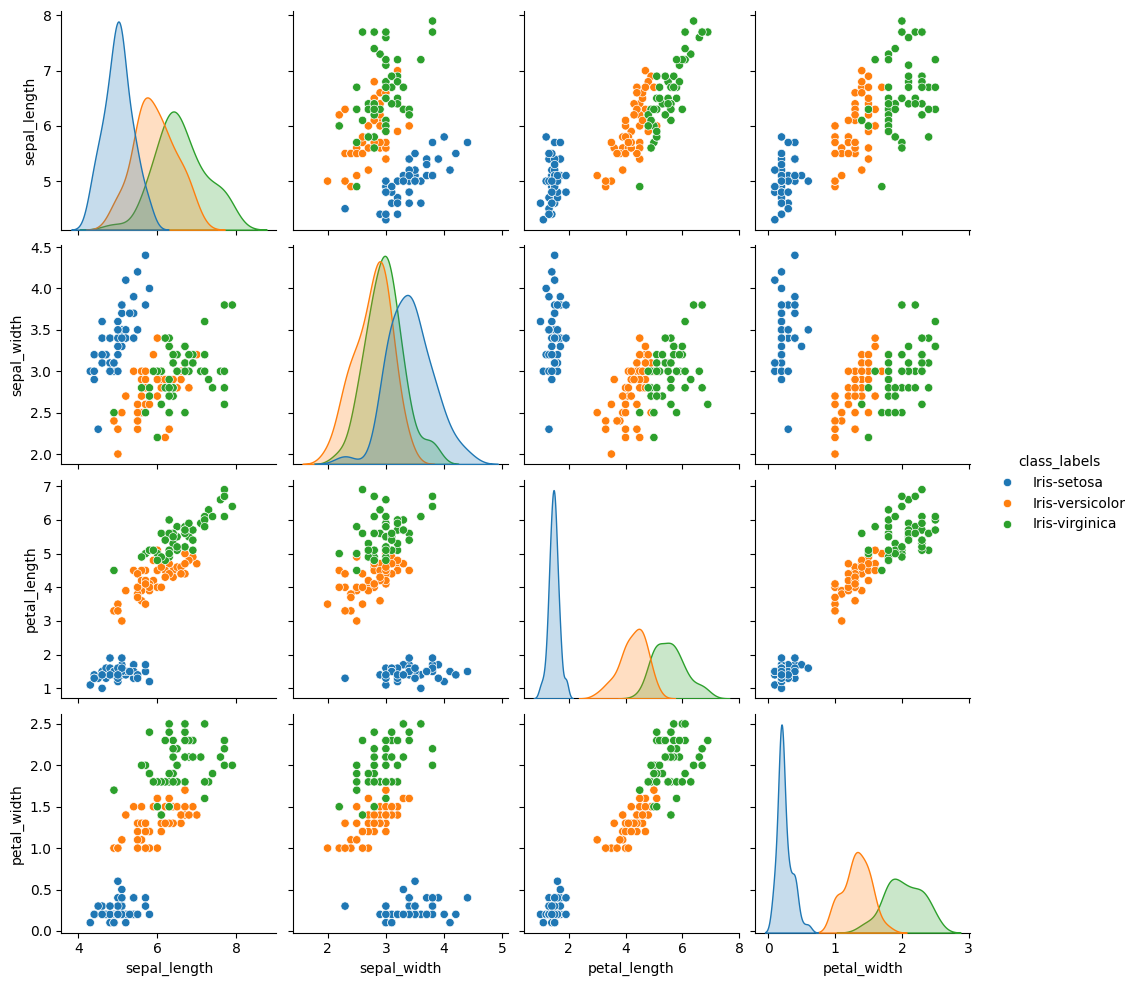

In [ ]:
# visualising
sns.pairplot(df, hue="class_labels")


from visualisatiom we can tell that iiris_setosa is well separated from other two flowers, iris_verginica is the longest flower and iris_setosa is the shortest

# separating the features and targets

In [ ]:
data = df.values
x=data[:,0:4]
y=data[:,4]

calculating the average of each calssses

In [ ]:
y_data=np.array([np.average(x[:,i][y==j].astype('float32'))
for i in range(x.shape[1])
for j in (np.unique(y))
])
y_data_Reshaped=y_data.reshape(4,3)
y_data_Reshaped=np.swapaxes(y_data_Reshaped,0,1)
x_axis=np.arange(len(columns)-1)
width = 0.25


0          1           2
[setosa, versicolor, virginica]

plot the average

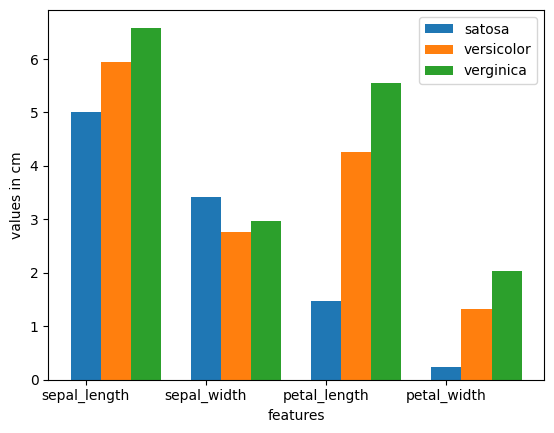

In [ ]:
plt.bar(x_axis, y_data_Reshaped[0], width, label="satosa")
plt.bar(x_axis+width, y_data_Reshaped[1],width, label="versicolor")
plt.bar(x_axis+width*2, y_data_Reshaped[2], width, label='verginica')
plt.xticks(x_axis, columns[:4])
plt.xlabel("features")
plt.ylabel("values in cm")
plt.legend(loc='best')


plt.show()

model training
# New Section

In [ ]:
# split the data to traing and testing data base

from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test=train_test_split(x, y, test_size=0.2)

In [ ]:
# svm(support vector machines)
# svc(support vector classifier)
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

evaluating the model

In [ ]:
preditions= svc_model.predict(x_test)


In [ ]:
preditions

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [ ]:
#  calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preditions)

0.9666666666666667

In [ ]:
# detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, preditions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



Test the model

In [ ]:
x_new = np.array([[5.7,3.4,2.5,0.4],[4.9,2.0,4.2,0.5],[6.7,3.3,5.7,2.5]])
precition =svc_model.predict(x_new)
print("predition : {}".format(precition))

predition : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
import pickle
with open('svm.pickle','wb') as f:
  pickle.dump(svc_model, f)


In [ ]:
with open('/content/svm.pickle','rb) as f:
  model= pickle.load(f)
